# Series2Graph Demo

This notebook describe and display all the step that series2graph preforms in order to detect abnormal subsequences in a time series.

In [1]:
import matplotlib.pyplot as plt

from series2graph import *

## Demo on an ECG time series

The full process of Time2graph applied on a time series corresponding to an electro-cardiogram from the ATM physiobank dataset (record 803).

In [2]:
import pandas as pd

df = pd.read_csv("../DATA/ATM_ECG_803.ts",header=None)[:100000]

print("Time Series Statistics:")
print("Number of points: {}".format(len(df)))

Time Series Statistics:
Number of points: 100000


## Parameters setting

In [3]:
pattern_length = 75
query_length = 100

## Computing the Graph

In [4]:
s2g = Series2Graph(pattern_length=pattern_length)
s2g.fit(df)

In [5]:
print("Graph Statistics:")
print("Number of nodes: {}".format(s2g.graph['Graph'].number_of_nodes()))
print("Number of edges: {}".format(s2g.graph['Graph'].number_of_edges()))

Graph Statistics:
Number of nodes: 99
Number of edges: 299


### Visualization of the embedding space

Text(0.5, 1.0, 'SProj(T,l,lambda)')

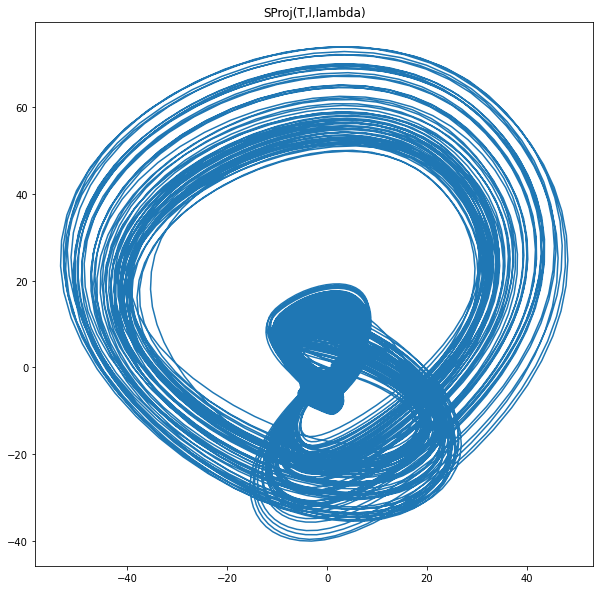

In [6]:
plt.figure(figsize=(10,10))
plt.plot(s2g.graph['proj_A']['0'],s2g.graph['proj_A']['1'])
plt.title("SProj(T,l,lambda)")

### Visualization of the graph

In [7]:
s2g.plot_graph()

ImportError: requires pygraphviz http://pygraphviz.github.io/

## Anomalies detection

In [ ]:
s2g.score(query_length)

### Visualization of the full time series

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,4))
ax[0].plot(df[0].values[0:len(s2g.all_score)])
ax[1].plot(s2g.all_score)
ax[0].set_xlim(0,len(s2g.all_score))
ax[1].set_xlim(0,len(s2g.all_score))

### Visualization of a snippet

(22500.0, 30000.0)

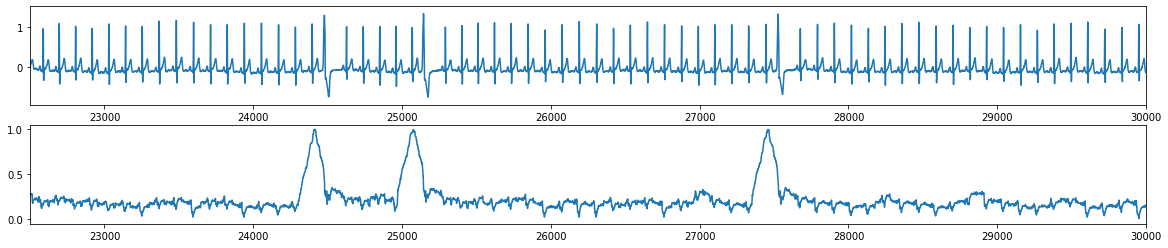

In [10]:
fig,ax = plt.subplots(2,1,figsize=(20,4))
ax[0].plot(df[0].values[0:len(s2g.all_score)])
ax[1].plot(s2g.all_score)
ax[0].set_xlim(22500,30000)
ax[1].set_xlim(22500,30000)